<a href="https://colab.research.google.com/github/Rey1380/Speech-Recognition-application-in-a-computer-game/blob/main/voice_command_CNN_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pydub

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools
import librosa
import tensorflow
from tensorflow.keras.models import load_model
import cv2
import wave
import pylab
from pydub import AudioSegment
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set paths to input and output data
INPUT_DIR = '/content/drive/MyDrive/voices/output16000'
OUTPUT_DIR= '/content/drive/MyDrive/spectrograms'
# Print names of WAV files from the input path
import os

if os.path.exists(INPUT_DIR): #if directory does exist
    parent_list = os.listdir(INPUT_DIR)
    for i in range(600):
        print(parent_list[i])
else: #if directory does not exist
    print(f"Path {INPUT_DIR} does not exist.")

down_141.wav
down_142.wav
down_143.wav
down_144.wav
down_145.wav
down_146.wav
down_148.wav
down_149.wav
down_147.wav
down_151.wav
down_150.wav
up_4.wav
up_7.wav
up_5.wav
up_2.wav
up_1.wav
up_6.wav
up_3.wav
up_9.wav
up_8.wav
up_10.wav
up_13.wav
up_11.wav
up_12.wav
up_14.wav
up_16.wav
up_15.wav
up_17.wav
up_18.wav
up_19.wav
up_20.wav
up_21.wav
up_22.wav
up_23.wav
up_24.wav
up_25.wav
up_26.wav
up_27.wav
up_28.wav
up_29.wav
up_31.wav
up_30.wav
up_32.wav
up_33.wav
up_34.wav
up_35.wav
up_36.wav
up_38.wav
up_37.wav
up_39.wav
up_40.wav
up_41.wav
up_42.wav
up_43.wav
up_44.wav
up_45.wav
up_46.wav
up_47.wav
up_48.wav
up_49.wav
up_50.wav
up_51.wav
up_52.wav
up_53.wav
up_54.wav
up_57.wav
up_55.wav
up_58.wav
up_56.wav
up_61.wav
up_60.wav
up_59.wav
up_62.wav
up_63.wav
up_64.wav
up_65.wav
up_66.wav
up_67.wav
up_68.wav
up_69.wav
up_70.wav
up_71.wav
up_72.wav
up_73.wav
up_74.wav
up_75.wav
up_76.wav
up_77.wav
up_78.wav
up_79.wav
up_80.wav
up_81.wav
up_83.wav
up_82.wav
up_84.wav
up_85.wav
up_86.wav
up_87.

In [ ]:
# Utility function to get sound and frame rate info
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate
# For every recording, make a spectogram and save it as label_speaker_no.png
if not os.path.exists(os.path.join(OUTPUT_DIR, 'audio-images')): #if there is no directory
    os.mkdir(os.path.join(OUTPUT_DIR, 'audio-images')) #make new directory for images

for filename in os.listdir(INPUT_DIR):
    if "wav" in filename: #check for .wav files
        file_path = os.path.join(INPUT_DIR, filename)
        file_stem = Path(file_path).stem #file name without suffix
        target_dir = f'class_{file_stem[0]}' #make folder for each class
        dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'audio-images'), target_dir)
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem
            sound_info, frame_rate = get_wav_info(file_path) #getting the wav info
            pylab.specgram(sound_info, Fs=frame_rate) #make specgram file
            pylab.savefig(f'{file_dist_path}.png') #save it as image
            pylab.close()
# Print the 4 classes in our dataset
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'audio-images'))
print("Classes: \n")
for i in range(4):
    print(path_list[i])
# File names for class d
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'audio-images/class_d'))
print("\nA few example files: \n")
for i in range(10):
    print(path_list[i])

Classes: 

class_d
class_u
class_l
class_r

A few example files: 

down_1.png
down_2.png
down_3.png
down_5.png
down_4.png
down_6.png
down_7.png
down_8.png
down_9.png
down_10.png


In [ ]:
# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 10
N_CHANNELS = 3
N_CLASSES = 4

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-images'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-images'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)
train_dataset

Found 600 files belonging to 4 classes.
Using 480 files for training.
Found 600 files belonging to 4 classes.
Using 120 files for validation.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

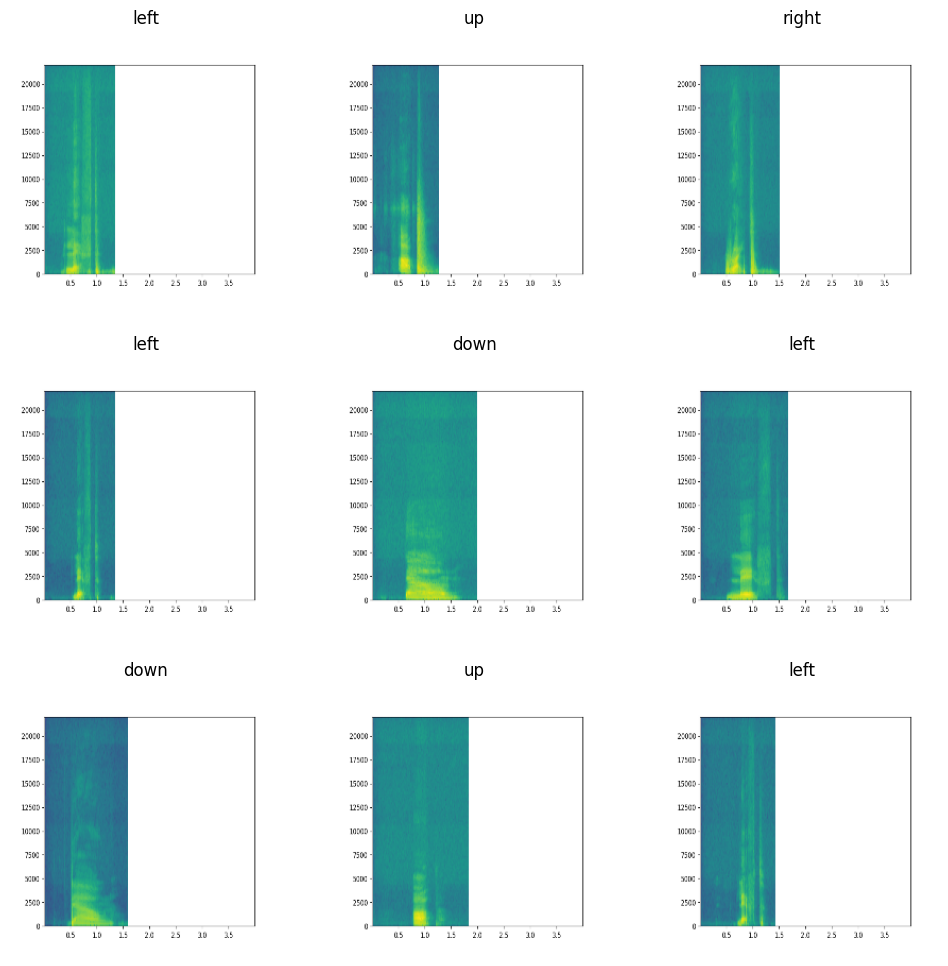

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if(int(labels[i])==0):
            plt.title("down")
        if(int(labels[i])==1):
            plt.title("left")
        if(int(labels[i])==2):
            plt.title("right")
        if(int(labels[i])==3):
            plt.title("up")
        plt.axis("off")
plt.show()

In [ ]:
# Function to prepare our datasets for modelling
def prepare(ds, augment=False):
    # Define our one transformation
    #changing the scale
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    #flip and rotate only used for train data
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])

    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)

In [ ]:
from tensorflow.keras.layers import Dropout
dropout_rate=0.5
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 20 epochs, capture the history
history = model.fit(train_dataset, epochs=20, validation_data=valid_dataset)

Epoch 1/20
48/48 [==============================] - 92s 2s/step - loss: 2.0343 - accuracy: 0.2729 - val_loss: 1.3879 - val_accuracy: 0.2000
Epoch 2/20
48/48 [==============================] - 31s 640ms/step - loss: 1.2573 - accuracy: 0.4313 - val_loss: 1.3531 - val_accuracy: 0.5500
Epoch 3/20
48/48 [==============================] - 30s 621ms/step - loss: 0.6580 - accuracy: 0.7667 - val_loss: 1.2205 - val_accuracy: 0.8083
Epoch 4/20
48/48 [==============================] - 30s 605ms/step - loss: 0.2651 - accuracy: 0.9208 - val_loss: 0.8783 - val_accuracy: 0.9667
Epoch 5/20
48/48 [==============================] - 30s 613ms/step - loss: 0.1953 - accuracy: 0.9312 - val_loss: 0.7198 - val_accuracy: 0.9667
Epoch 6/20
48/48 [==============================] - 36s 714ms/step - loss: 0.1095 - accuracy: 0.9500 - val_loss: 0.6241 - val_accuracy: 0.9583
Epoch 7/20
48/48 [==============================] - 49s 1s/step - loss: 0.0693 - accuracy: 0.9750 - val_loss: 0.3754 - val_accuracy: 0.9583
Epoch

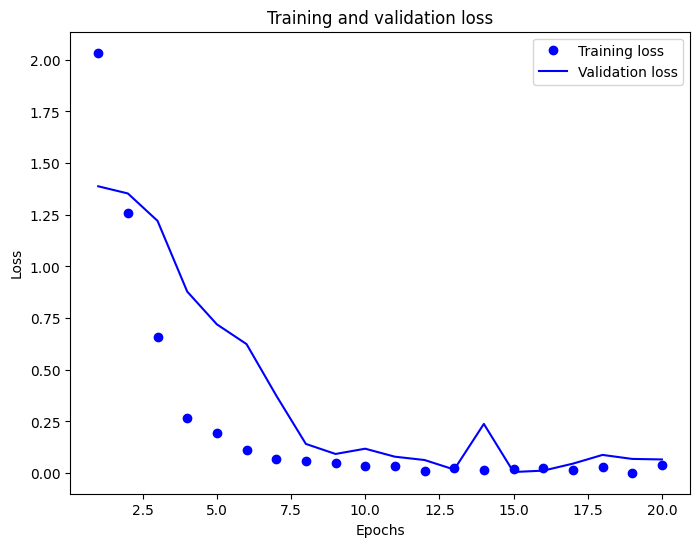

In [ ]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

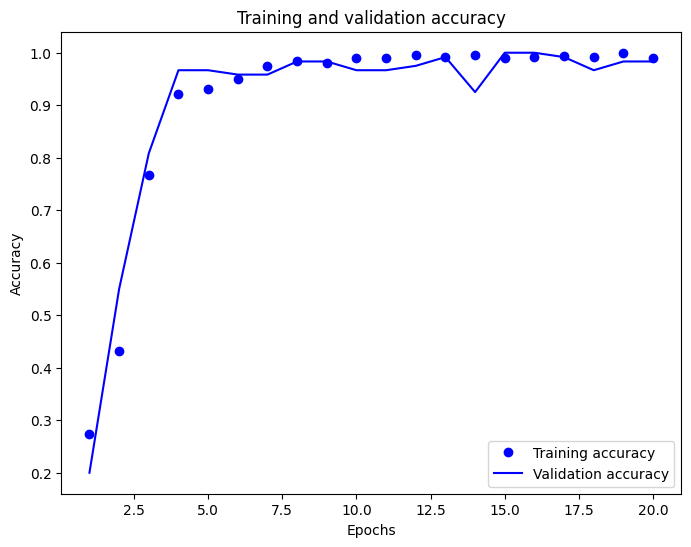

In [ ]:
# Plot the accuracy curves for training and validation.
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Compute the final loss and accuracy
final_loss, final_acc = model.evaluate(valid_dataset, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.065852, final accuracy: 0.983333


In [ ]:
model.save('CNN.h5')

In [ ]:
class VoiceCommandSystem:
    def __init__(self, predicted_label, player_position):
        self.predicted_label = predicted_label
        self.player_position = player_position

    def move_up(self):
        self.player_position[1] += 1
        print("Moving the player up. Player position:", self.player_position)

    def move_down(self):
        self.player_position[1] -= 1
        print("Moving the player down. Player position:", self.player_position)

    def move_left(self):
        self.player_position[0] -= 1
        print("Moving the player left. Player position:", self.player_position)

    def move_right(self):
        self.player_position[0] += 1
        print("Moving the player right. Player position:", self.player_position)

    def recognize_command(self, predicted_label):

        if predicted_label == "up":
            self.move_up()
        elif predicted_label == "down":
            self.move_down()
        elif predicted_label == "left":
            self.move_left()
        elif predicted_label == "right":
            self.move_right()

        player_position_str = f"Player position: {self.player_position}"
        return player_position_str

In [ ]:
# Load model
model = load_model('CNN.h5')

player_pos=[0,0]
#preprocess the input audio file
#sampling function
def sample(file_path):
    target_duration = 4000  # target duration in milliseconds
    speech_array, sample_rate = librosa.load(file_path,sr=16000) #load data
    speech_array = speech_array.squeeze().astype(np.float)

    # Process audio file and save it to the output directory
    audio = AudioSegment.from_wav(file_path)
    length = len(audio)

    if length < target_duration:
        # Zero-pad the audio file
        padding = AudioSegment.silent(duration=target_duration - length)
        audio = audio + padding
    elif length > target_duration:
        # Trim the audio file
        audio = audio[:target_duration]

    # Save the output file with the same name to the same directory
    output_dir = os.path.dirname(file_path)
    output_file = os.path.join(output_dir, os.path.basename(file_path))
    audio.export(output_file, format="wav")

# function to get sound and frame rate info
def wav_info(wav_file):
    wav = wave.open(str(wav_file))
    frames = wav.readframes(-1)
    soundinfo = pylab.frombuffer(frames, 'int16')
    framerate = wav.getframerate()
    wav.close()
    return soundinfo, framerate

def transcribe_audio(file_path, player_pos):
    sample(file_path) #preprocess the input audio file
    # Convert audio to spectrogram
    file_stem = Path(file_path).stem
    dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'test'))
    file_dist_path = os.path.join(dist_dir, file_stem)
    if not os.path.exists(file_dist_path + '.png'):
        if not os.path.exists(dist_dir):
            os.mkdir(dist_dir)
        soundinfo, framerate = wav_info(file_path)
        pylab.specgram(soundinfo, Fs=framerate) #making the spectrogram
        pylab.savefig(f'{file_dist_path}.png') #saving the spectrogram
        pylab.close()
    #loading the spectrogram and converting ti RGB
    image=cv2.imread(f'{file_dist_path}.png')
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Check that the image was read successfully
    assert image is not None, f"Failed to read image at {file_dist_path}"
    # Resize image to match model input shape
    image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)
    # Check that the resized image has the correct shape
    assert image.shape == (256, 256, 3), f"Resized image has incorrect shape: {image.shape}"
    # Plot spectrogram to check if the preprocessing is correct
    import matplotlib.pyplot as plt
    plt.imshow(image)

    # Create an instance of the VoiceCommandSystem class
    voice_command_system = VoiceCommandSystem("", player_pos)

    # Transcribe speech from spectrogram using model
    prediction = model.predict(np.expand_dims(image, axis=0))
    prediction = prediction.reshape(-1)
    transcription = np.argmax(prediction)
    # Get the transcription label
    labels = ['down', 'left', 'right', 'up']
    transcription_label = labels[transcription]
    # Call the recognize_command method of the VoiceCommandSystem instance
    player_pos = voice_command_system.recognize_command(transcription_label)

    return transcription_label, player_pos

In [ ]:
!pip install gradio

In [ ]:
# Set initial player position
player_pos = [0, 0]

# Define the function for the interface
def transcribe_and_move(file_path):
    global player_pos
    transcription_label, player_pos = transcribe_audio(file_path, player_pos)
    return transcription_label, player_pos

# Create the interface
gr.Interface(fn=transcribe_and_move,
              inputs=gr.inputs.Audio(label="Speak Command", type="filepath"),
              outputs=[gr.outputs.Textbox(label="Transcription"), gr.outputs.Label(label="Player Position: " + str(player_pos), type="text")]).launch()

/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>